In [1]:
## import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

plt.rcParams.update({'font.family':'sans-serif'})

In [2]:
## import table from HFHI
mortgagerelief = pd.read_csv('MRData.csv')
mortgagerelief.head(1)

,Affiliate,ID,Loan No,Street Address\n(ex: 1234 Five Lane),City,State Abbreviation,Zip,Sales Price,Closing Date\n(mm/yyyy),Term (Months),...,12-month report\nFinancial counseling provided during period of mortgage relief,12-month report\nOther training/support received from HFH?,12-month report\nDescription of other training received,12-month report\nReferrals to other agencies,12-month report\nDescribe referral,12-month report Resident Loan number-referenced) currently residing in home?,"12-month report If resident no longer residing in home, please explain",12-month report-additional details on titleholders residing in home,Note,Funds
0,Aitkin County HFH (MN),1,78001567,NaN,Aitkin,MN,56431,"$ 88,800.00",9/27/2013,240.0,...,Yes,No,local banker/mentor,No,NaN,Yes,NaN,NaN,NaN,Thrivent


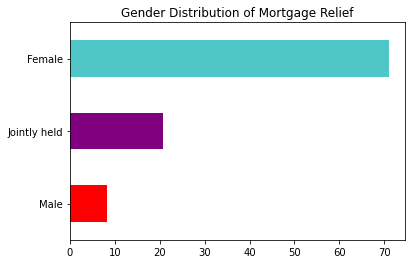

In [3]:
#plot gender data
genders = mortgagerelief['Title Holder Gender'].str.capitalize().value_counts().sort_values()
# takes gender column, standardizes data, groupby
genders = genders/sum(genders)*100
# make genders into proportions
genders.plot.barh(color=['red','purple','#50C7C7'])
# create horizontal bar plot with different colors
plt.title('Gender Distribution of Mortgage Relief');


<AxesSubplot:>

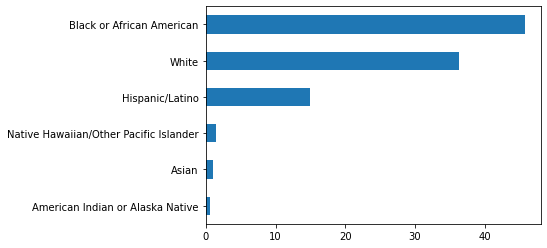

In [4]:
races = mortgagerelief[['Asian: Race/Ethnicity title holders','Black or African American: Race/Ethnicity of title holders','White: Race/Ethnicity of title holders',
       'Native Hawaiian/Other Pacific Islander: Race/Ethnicity of title holders',
       'American Indian or Alaska Native: Race/Ethnicity of title holders',
       'Hispanic/Latino: Race/Ethnicity of title holders',
       "Don't Know or Don't want to Answer: Race/Ethnicity of title holders"]]
races = races.rename(columns={'Asian: Race/Ethnicity title holders': 'Asian', 'Black or African American: Race/Ethnicity of title holders': 'Black or African American', 'White: Race/Ethnicity of title holders':'White',
                             'Native Hawaiian/Other Pacific Islander: Race/Ethnicity of title holders': 'Native Hawaiian/Other Pacific Islander', 'American Indian or Alaska Native: Race/Ethnicity of title holders':'American Indian or Alaska Native',
                             'Hispanic/Latino: Race/Ethnicity of title holders':'Hispanic/Latino', "Don't Know or Don't want to Answer: Race/Ethnicity of title holders": "Don't Know or Don't Want to Answer"})
races = races.fillna('No') 
races = races.replace({'Yes':1,'No':0, 'yes':1, 'no':0, "YES": 1, "NO": 0, " Yes ": 1, "*": 0, "X": 1})
races = races.sum(axis = 0) #add up total number of 
noAnswer = races["Don't Know or Don't Want to Answer"] #number of people who answered no race
races1 = races.drop("Don't Know or Don't Want to Answer") #we're not using data of people who answered no race
races1 = races1 / sum(races1) * 100
races1 = races1.sort_values()
races1.plot.barh()


<AxesSubplot:>

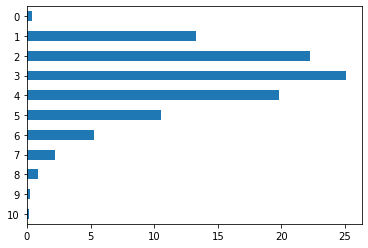

In [5]:
## Total # of people who reside in the household
numppl = mortgagerelief['Total # of people living in the household'].dropna()
#numpplused = numppl.value_counts().drop(['Unkown','Unknown','na'])
#numppl[pd.to_numeric(numppl['id'], errors='coerce').notnull()]
numppl = numppl[pd.to_numeric(numppl, errors='coerce').notnull()].astype(int).value_counts().sort_index(ascending=False)
numppl = numppl/sum(numppl)*100
numppl.plot.barh()

<AxesSubplot:>

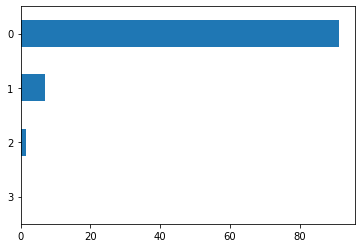

In [6]:
## number of individuals with a disability who reside in the household
numdisabled = mortgagerelief['# in HH with disability'].fillna(0) #.astype(int)
numdisabled = numdisabled[pd.to_numeric(numdisabled, errors='coerce').notnull()].astype(int).value_counts().sort_index(ascending=False)
numdisabled = numdisabled/sum(numdisabled)*100
numdisabled.plot.barh()

<AxesSubplot:>

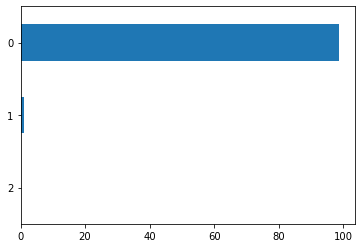

In [7]:
## number of individuals who served or are currently serving who reside in the household
numserved = mortgagerelief['# in HH  served or is currently serving in the military?'].fillna(0)
numserved = numserved[pd.to_numeric(numserved, errors='coerce').notnull()].astype(int).value_counts().sort_index(ascending=False)
numserved = numserved/sum(numserved)*100
numserved.plot.barh()

<AxesSubplot:>

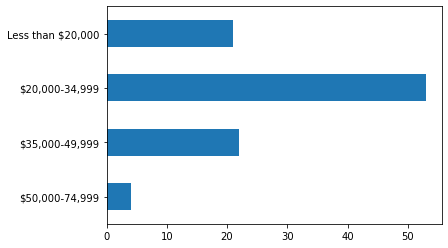

In [35]:
## Annual household income
income = mortgagerelief['HH income'].dropna().value_counts().drop(['Unkown','$50,000 ', '$41,000 '])
income = income/sum(income)*100
income = income[['$50,000-74,999','$35,000-49,999','$20,000-34,999','Less than $20,000']]
income.plot.barh()

<AxesSubplot:>

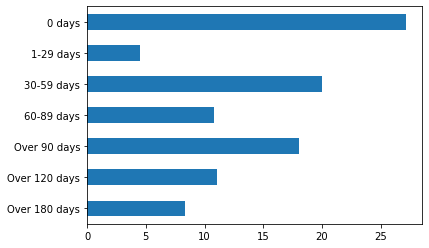

In [102]:
## Days delinquent: Baseline
baseline = mortgagerelief[['Days Delinquent (reported by the 5th of the month for the previous month)']].dropna().reset_index()
baseline= baseline['Days Delinquent (reported by the 5th of the month for the previous month)']
baseline = baseline.str.replace(' ','').str.lower().str.replace('+','').str.replace('days','').str.replace('over','') #.reset_index()
baseline = baseline.str.split('-').str[0]
baselinecat = baseline.copy()

for i in np.arange(len(baselinecat)):
    if len(baselinecat[i])<= 3:
        if int(baselinecat[i]) == 0:
            baselinecat[i] = '0 days'
        elif int(baselinecat[i]) < 30:
            baselinecat[i] = '1-29 days'
        elif int(baselinecat[i]) < 60:
            baselinecat[i] = '30-59 days'
        elif int(baselinecat[i]) < 90:
            baselinecat[i] = '60-89 days'
        elif int(baselinecat[i]) < 120:
            baselinecat[i] = 'Over 90 days'
        elif int(baselinecat[i]) < 180:
            baselinecat[i] = 'Over 120 days'
        elif int(baselinecat[i]) >= 180:
            baselinecat[i] = 'Over 180 days'
            
baselinecat = baselinecat.replace({'2months':'60-89 days','3months':'Over 90 days'}).value_counts()
baselinecat = baselinecat[['Over 180 days','Over 120 days','Over 90 days','60-89 days','30-59 days','1-29 days','0 days']]
baselinecat = baselinecat/sum(baselinecat)*100
baselinecat.plot.barh()

In [159]:
## Why are households delinquent on their mortgage? (baseline)

s1 = mortgagerelief['Reasons delinquent']
s2 = mortgagerelief['Describe other reasons delinquent']
reasons1 = pd.concat([s1, s2]).dropna()
reasons1.value_counts()

Cut hours                                               241
Job loss                                                223
Furlough                                                104
Other                                                    88
Compromised health                                       74
                                                       ... 
non-COVID health issues                                   1
Was Laid off from job                                     1
Wife passed away recently                                 1
Tested positive for COVID and has lost hours and pay      1
Payment plan                                              1
Length: 109, dtype: int64

<AxesSubplot:>

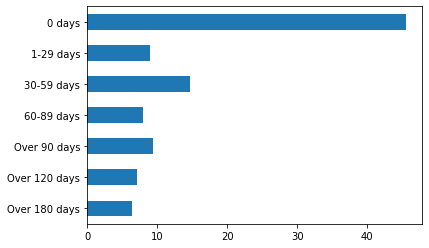

In [141]:
## days delinquent: 6 month
sixmonth = mortgagerelief[['6-month report \nDays Delinquent (reported by the 5th of the month for the previous month)']].dropna().reset_index()
sixmonth = sixmonth['6-month report \nDays Delinquent (reported by the 5th of the month for the previous month)']
sixmonth = sixmonth.str.replace(' ','').str.lower().str.replace('+','').str.replace('days','').str.replace('over','')
sixmonth = sixmonth.str.split('to').str[0].str.split('-').str[0]
sixmonth = sixmonth.replace({'lessthan30':29,'30pluscurrentpayment':30,'15daylate':15})
sixmonth = sixmonth[pd.to_numeric(sixmonth, errors='coerce').notnull()]
#print(sixmonth.to_string())
sixmonthcat = sixmonth.copy()

for i in sixmonthcat.index:
    if int(sixmonthcat[i]) == 0:
        sixmonthcat[i] = '0 days'
    elif int(sixmonthcat[i]) < 30:
        sixmonthcat[i] = '1-29 days'
    elif int(sixmonthcat[i]) < 60:
        sixmonthcat[i] = '30-59 days'
    elif int(sixmonthcat[i]) < 90:
        sixmonthcat[i] = '60-89 days'
    elif int(sixmonthcat[i]) < 120:
        sixmonthcat[i] = 'Over 90 days'
    elif int(sixmonthcat[i]) < 180:
        sixmonthcat[i] = 'Over 120 days'
    elif int(sixmonthcat[i]) >= 180:
        sixmonthcat[i] = 'Over 180 days'
            
sixmonthcat = sixmonthcat.value_counts() 
sixmonthcat = sixmonthcat[['Over 180 days','Over 120 days','Over 90 days','60-89 days','30-59 days','1-29 days','0 days']]
sixmonthcat = sixmonthcat/sum(sixmonthcat)*100
sixmonthcat.plot.barh()

In [161]:
## Why are households delinquent on their mortgage? (6 month)

s1 = mortgagerelief['6-month report\nReasons delinquent']
s2 = mortgagerelief['6-month report\nDescribe other reasons delinquent']
reasons2 = pd.concat([s1, s2]).dropna()
reasons2.value_counts()

Cut hours                                             157
Other                                                 102
Job loss                                              100
Compromised health                                     53
Furlough                                               45
                                                     ... 
Increase in  HO insurance and navigating resources      1
covid, quarantine                                       1
Job loss                                                1
victim of scam/fraud                                    1
COVID                                                   1
Length: 84, dtype: int64

<AxesSubplot:>

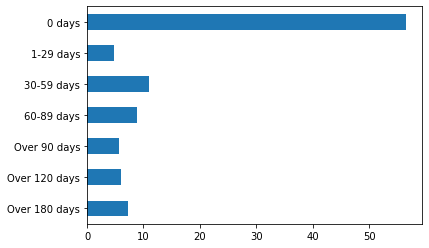

In [155]:
## days delinquent: 12 month
twelvemonth = mortgagerelief['12-month report \nDays Delinquent (reported by the 5th of the month for the previous month)']
twelvemonth = twelvemonth.str.replace(' ','').str.lower().str.replace('+','').str.replace('days','').str.replace('over','').str.replace('.','')
twelvemonth = twelvemonth.str.split('to').str[0].str.split('-').str[0]
twelvemonth = twelvemonth.replace({'lessthan30':29,'<30':29,'15late':15,'8month':240})
twelvemonth = twelvemonth[pd.to_numeric(twelvemonth, errors='coerce').notnull()].astype(int)
twelvemonth.value_counts()

twelvemonthmonthcat = twelvemonth.copy()

for i in twelvemonthmonthcat.index:
    if int(twelvemonthmonthcat[i]) == 0:
        twelvemonthmonthcat[i] = '0 days'
    elif int(twelvemonthmonthcat[i]) < 30:
        twelvemonthmonthcat[i] = '1-29 days'
    elif int(twelvemonthmonthcat[i]) < 60:
        twelvemonthmonthcat[i] = '30-59 days'
    elif int(twelvemonthmonthcat[i]) < 90:
        twelvemonthmonthcat[i] = '60-89 days'
    elif int(twelvemonthmonthcat[i]) < 120:
        twelvemonthmonthcat[i] = 'Over 90 days'
    elif int(twelvemonthmonthcat[i]) < 180:
        twelvemonthmonthcat[i] = 'Over 120 days'
    elif int(twelvemonthmonthcat[i]) >= 180:
        twelvemonthmonthcat[i] = 'Over 180 days'
            
twelvemonthmonthcat = twelvemonthmonthcat.value_counts() 
twelvemonthmonthcat = twelvemonthmonthcat[['Over 180 days','Over 120 days','Over 90 days','60-89 days','30-59 days','1-29 days','0 days']]
twelvemonthmonthcat = twelvemonthmonthcat/sum(twelvemonthmonthcat)*100
twelvemonthmonthcat.plot.barh()

In [164]:
## Why are households delinquent on their mortgage? (6 month)

s1 = mortgagerelief['12-month report\nReasons delinquent']
s2 = mortgagerelief['12-month report\nDescribe other reasons delinquent']
reasons3 = pd.concat([s1, s2]).dropna()
reasons3.value_counts()

Cut hours                85
Other                    80
Job loss                 56
Compromised health       45
Furlough                 25
                         ..
repayment plan            1
Still on Payment plan     1
cut hours                 1
Property Sold             1
Compromised Health        1
Length: 73, dtype: int64